In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/content/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [9]:
df.type.value_counts(normalize= True)

Movie      0.696151
TV Show    0.303849
Name: type, dtype: float64

In [10]:
 for column in df.columns:
   print("Column : ", column)
   mask = df[column].isnull()

   if mask.any:
     print("\tThere are null values --> ", column)
     mode_value = df[column].mode().iloc[0]
     print("\t\tFilling with Mode values --> ", mode_value)
     df[column].fillna(mode_value, inplace=True)


Column :  show_id
	There are null values -->  show_id
		Filling with Mode values -->  s1
Column :  type
	There are null values -->  type
		Filling with Mode values -->  Movie
Column :  title
	There are null values -->  title
		Filling with Mode values -->  #Alive
Column :  director
	There are null values -->  director
		Filling with Mode values -->  Rajiv Chilaka
Column :  cast
	There are null values -->  cast
		Filling with Mode values -->  David Attenborough
Column :  country
	There are null values -->  country
		Filling with Mode values -->  United States
Column :  date_added
	There are null values -->  date_added
		Filling with Mode values -->  January 1, 2020
Column :  release_year
	There are null values -->  release_year
		Filling with Mode values -->  2018
Column :  rating
	There are null values -->  rating
		Filling with Mode values -->  TV-MA
Column :  duration
	There are null values -->  duration
		Filling with Mode values -->  1 Season
Column :  listed_in
	There are null val

## Visualization

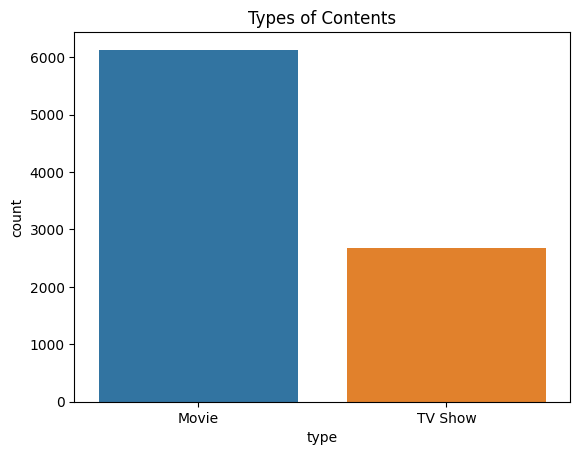

In [11]:
sns.countplot(data = df,
              x = "type")
plt.title("Types of Contents")
plt.show()

<Axes: ylabel='type'>

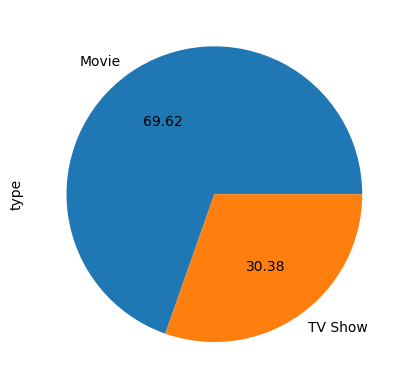

In [12]:
#or

df["type"].value_counts().plot(kind= "pie",
                               autopct= "%1.2f")

## The top 10 countries that produce the most content

In [13]:
top_countries = df["country"].value_counts().head(10)

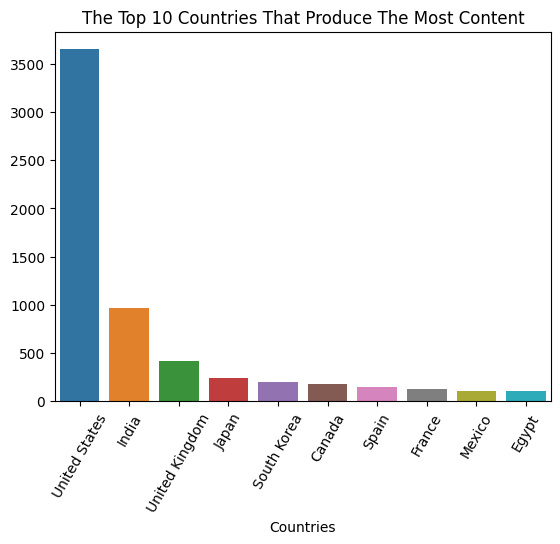

In [14]:
sns.barplot(x = top_countries.index, y = top_countries.values)
plt.xticks(rotation = 60)
#alternative --> sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("The Top 10 Countries That Produce The Most Content")
plt.xlabel("Countries")
plt.show()

In [15]:
df["date_added"] = pd.to_datetime(df["date_added"])
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9


## Pivot Table

In [16]:
movie_counts = df[df["type"] == "Movie"].groupby(["year_added", "month_added"])
movie_counts = movie_counts.size().reset_index(name = "count")
heatmap_data = movie_counts.pivot_table(values= "count", index= "year_added", columns= "month_added", fill_value= 0)
heatmap_data

month_added,1,2,3,4,5,6,7,8,9,10,11,12
year_added,,,,,,,,,,,,
2008,1,0,0,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,1,0,0,0,0,0,1,0
2010,0,0,0,0,0,0,0,0,0,0,1,0
2011,0,0,0,0,1,0,0,0,1,11,0,0
2012,0,1,0,0,0,0,0,0,0,0,1,1
2013,0,0,0,0,0,0,0,0,1,1,2,2
2014,2,1,0,1,0,1,1,1,1,4,2,5
2015,1,3,3,1,5,4,5,2,6,10,2,14
2016,15,9,14,14,9,11,19,23,29,32,26,52


## Heat Map

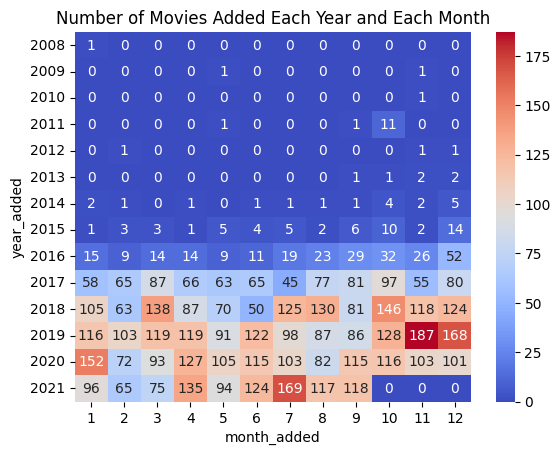

In [17]:
sns.heatmap(data = heatmap_data,
            annot= True,
            fmt= "d",
            cmap= "coolwarm")
plt.title("Number of Movies Added Each Year and Each Month")
plt.show()

In [18]:
release_counts = df.groupby(["release_year", "type"]).size().reset_index(name= "count")
release_counts

,release_year,type,count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,Movie,277


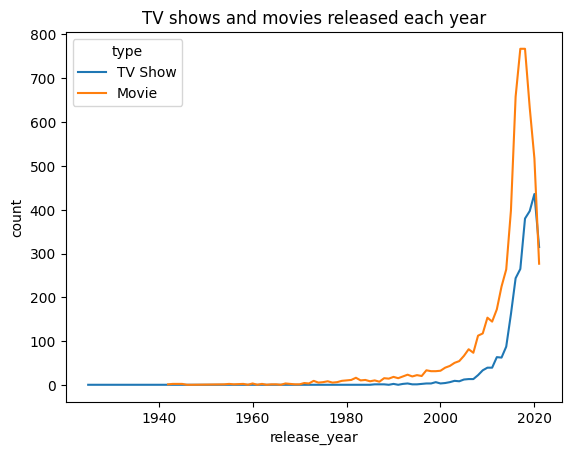

In [19]:
sns.lineplot(data= release_counts,
             x = "release_year",
             y = "count",
             hue = "type")
plt.title("TV shows and movies released each year")
plt.show()

In [23]:
content_counts = df.groupby(["year_added", "type"]).size().reset_index(name= "count")
content_counts

,year_added,type,count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


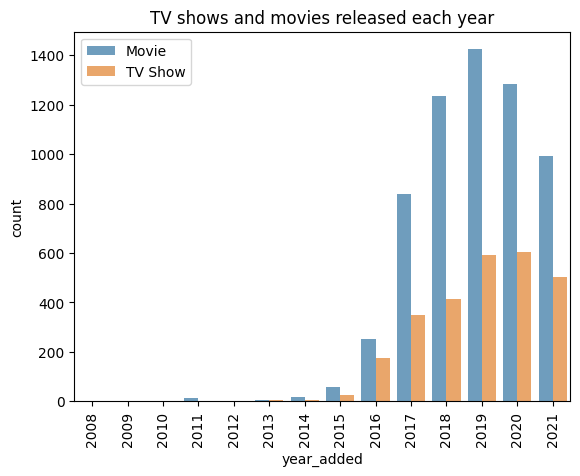

In [27]:
sns.barplot(data= content_counts,
            x= "year_added",
            y= "count",
            hue= "type",
            alpha= 0.7,
            )
plt.xticks(rotation= 90)
plt.title("TV shows and movies released each year")
plt.legend(loc= "upper left")
plt.show()